In [3]:
import numpy as np
from scipy.integrate import odeint
import pandas as pd
import warnings
pd.set_option('display.float_format', '{:0.8f}'.format)
import matplotlib.pyplot as plt

folder_names = ["case39bus9gen_halfperturb", "case39bus10gen_onetenthperturb"]
case_names = ["Strong Perturbations", "Weak Perturbations"]

result_dict_up = {}

#Loading data frames
num_permutations = 4
# folder_name_1 = "case39bus9gen_halfperturb"
folder_name_1 = "case39bus10gen_onetenthperturb"
noise_perc_value = 0.001
snr = "30dB"
# snr_list = ["No noise", "40dB", "30dB", "20dB"]
result_dict_up = {}
for folder_name, case_name in zip(folder_names, case_names):
    result_dict_up[case_name] = pd.read_csv(
        "{}/{}-{}_noise_{}_permutation.csv".format(folder_name, folder_name, noise_perc_value,
                                                                   num_permutations))

#Plotting each of the dataframes
total_relations = 49
from matplotlib import pyplot as plt





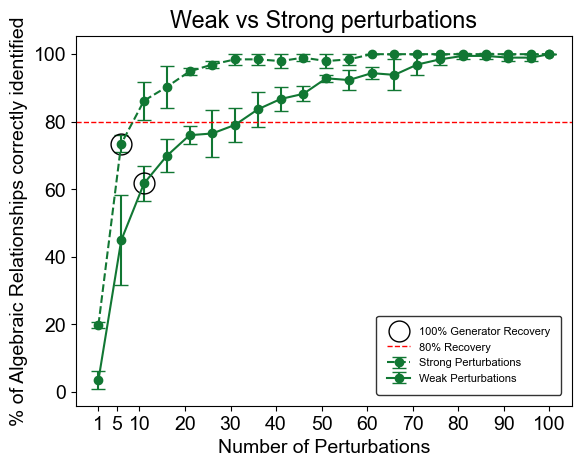

In [10]:
plt.xticks(fontsize=14)  # Increase font size of x-axis ticks
plt.yticks(fontsize=14)  # Increase font size of y-axis ticks
color_dict = {"No noise":"#332288",
              "40dB": "#CC6677",
              "30dB":"#117733",
               "20dB":"#882255"}
for case_name, result_df_ in result_dict_up.items():
    # plt.plot(result_df_["#Perturbations"],
    #          (total_relations-result_df_["#Incorrect relationship"])*100/total_relations, '.-', label = snr)
    line_fmt = '-o' if case_name == "Weak Perturbations" else '--o'

    gen_full_recovery_pert = result_df_[result_df_["#Incorrect gen relationship mean"] == 0]["#Perturbations"].iloc[0]
    gen_full_recovery_incorr = (total_relations - result_df_[result_df_["#Incorrect gen relationship mean"] == 0][
        "#Incorrect relationship mean"].iloc[0]) * 100 / total_relations
    # print(gen_full_recovery_pert, gen_full_recovery_incorr)

    # plt.errorbar(result_df_["#Perturbations"],
    #              (total_relations - result_df_["#Incorrect relationship mean"]) * 100 / total_relations,
    #               (result_df_["#Incorrect relationship std"]) * 100 / total_relations,
    #              fmt=line_fmt, label=snr, capsize=5)
    line, _, _ = plt.errorbar(result_df_["#Perturbations"],
                              (total_relations - result_df_["#Incorrect relationship mean"]) * 100 / total_relations,
                              (result_df_["#Incorrect relationship std"]) * 100 / total_relations,
                              fmt=line_fmt, label=case_name, capsize=5, color=color_dict[snr])
    label_ = '100% Generator Recovery' if case_name == "Weak Perturbations" else ""
    plt.plot([gen_full_recovery_pert], [gen_full_recovery_incorr], marker='o',
             markersize=15, linestyle='', markerfacecolor='none', label=label_,
             color='black')  # Square markers, no line

    # plt.errorbar(x, y_mean, yerr=y_std, fmt='-o', label='Mean with Std Error', capsize=5)
    # plt.axhline(y=10, color='r', linestyle='--', linewidth=1, label='Reference Line')
    # plt.xticks(range(1, len(sing_vals_1)+1, 1))
    # plt.ylim(np.log(sing_vals_1)[-1]-1, np.log(sing_vals_1)[0]+1)

plt.axhline(y=80, color='r', linestyle='--', linewidth=1, label='80% Recovery')

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14
# Set labels for X and Y axes
plt.xlabel('Number of Perturbations')
plt.ylabel('% of Algebraic Relationships correctly identified')
plt.xticks([1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

plt.legend(
    # loc='lower right',
    prop={'size': 8},
    frameon=True,  # Ensure the legend box is visible
    borderpad=1,  # Padding between the border and the legend content
    borderaxespad=1,  # Padding between the legend and the axes
    fancybox=True,  # Rounded border corners (set to False for square corners)
    edgecolor='black'
)

plt.title("Weak vs Strong perturbations")


plt.savefig('{}.svg'.format("Strong_vs_weak"),
            format='svg', bbox_inches='tight')